In [1]:
%load_ext autoreload
%autoreload 2
from models import *

# Plot results from theorems

In [2]:
# default values, when not varying
VAR_US = 1
VAR_IT = 1
VAR_NOI = 0.5
M = 300
N = 1000

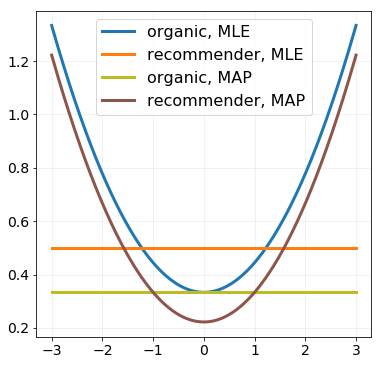

In [3]:
# Figure 2
x_range = np.arange(-3, 3.01, 0.01)
org_mle_mse = [get_mse_at_x(VAR_US, VAR_IT, VAR_NOI, x, 'org', 'mle') for x in x_range]
rec_mle_mse = [get_mse_at_x(VAR_US, VAR_IT, VAR_NOI, x, 'rec', 'mle') for x in x_range]
org_map_mse = [get_mse_at_x(VAR_US, VAR_IT, VAR_NOI, x, 'org', 'map') for x in x_range]
rec_map_mse = [get_mse_at_x(VAR_US, VAR_IT, VAR_NOI, x, 'rec', 'map') for x in x_range]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x_range, org_mle_mse, label='organic, MLE', color='tab:blue', linewidth=3)
ax.plot(x_range, rec_mle_mse, label='recommender, MLE', color='tab:orange', linewidth=3)
ax.plot(x_range, org_map_mse, label='organic, MAP', color='tab:olive', linewidth=3)
ax.plot(x_range, rec_map_mse, label='recommender, MAP', color='tab:brown', linewidth=3)
ax.legend(fontsize=16, loc='upper center')
ax.grid(alpha=.2)

ax.tick_params(labelsize=14)

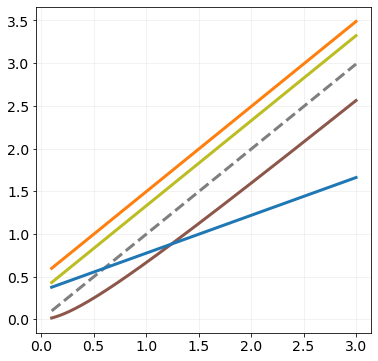

In [7]:
# Figure 3 - left
var_us_range = np.arange(0.1, 3.01, 0.01)
org_mle_varyk = [get_expected_Yk_var(v, VAR_IT, VAR_NOI, 'org', 'mle', m=M) for v in var_us_range]
rec_mle_varyk = [get_expected_Yk_var(v, VAR_IT, VAR_NOI, 'rec', 'mle', m=M) for v in var_us_range]
org_map_varyk = [get_expected_Yk_var(v, VAR_IT, VAR_NOI, 'org', 'map', m=M) for v in var_us_range]
rec_map_varyk = [get_expected_Yk_var(v, VAR_IT, VAR_NOI, 'rec', 'map', m=M) for v in var_us_range]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(var_us_range, rec_mle_varyk, color='tab:orange', linewidth=3)
ax.plot(var_us_range, org_map_varyk, color='tab:olive', linewidth=3)
ax.plot(var_us_range, ((M-1)/M) * var_us_range, color='tab:grey', linewidth=3, linestyle='dashed')
ax.plot(var_us_range, rec_map_varyk, color='tab:brown', linewidth=3)
ax.plot(var_us_range, org_mle_varyk, color='tab:blue', linewidth=3)
# ax.legend(fontsize=16, loc='upper left')
ax.grid(alpha=.2)
ax.tick_params(labelsize=14)
ylim = ax.get_ylim()

(-0.15697499999999995, 3.661919444444443)

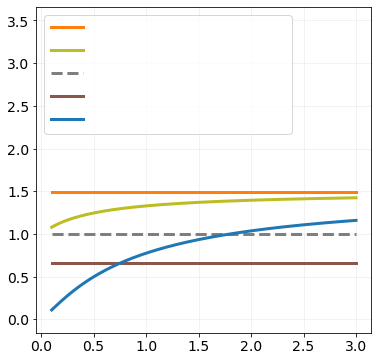

In [10]:
# Figure 3 - right
var_it_range = np.arange(0.1, 3.01, 0.01)
org_mle_varyk = [get_expected_Yk_var(VAR_US, v, VAR_NOI, 'org', 'mle', m=M) for v in var_it_range]
rec_mle_varyk = [get_expected_Yk_var(VAR_US, v, VAR_NOI, 'rec', 'mle', m=M) for v in var_it_range]
org_map_varyk = [get_expected_Yk_var(VAR_US, v, VAR_NOI, 'org', 'map', m=M) for v in var_it_range]
rec_map_varyk = [get_expected_Yk_var(VAR_US, v, VAR_NOI, 'rec', 'map', m=M) for v in var_it_range]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
placeholder = '                                     '  # space so we can write in labels with mathematical font
ax.plot(var_it_range, rec_mle_varyk, label=placeholder, color='tab:orange', linewidth=3)
ax.plot(var_it_range, org_map_varyk, label=placeholder, color='tab:olive', linewidth=3)
exp_var_us = ((M-1)/M) * VAR_US
ax.plot([var_it_range[0], var_it_range[-1]], [exp_var_us, exp_var_us], label=placeholder, color='tab:grey', linewidth=3, linestyle='dashed')
ax.plot(var_it_range, rec_map_varyk, label=placeholder, color='tab:brown', linewidth=3)
ax.plot(var_it_range, org_mle_varyk, label=placeholder, color='tab:blue', linewidth=3)
ax.legend(fontsize=16, loc='upper left')
ax.grid(alpha=.2)
ax.tick_params(labelsize=14)
ax.set_ylim(ylim)

# Simulations over values of n

## Individual metrics

20
40
60
80
100
120
140
160
180
200


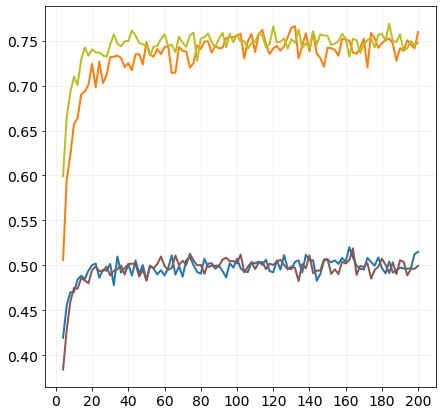

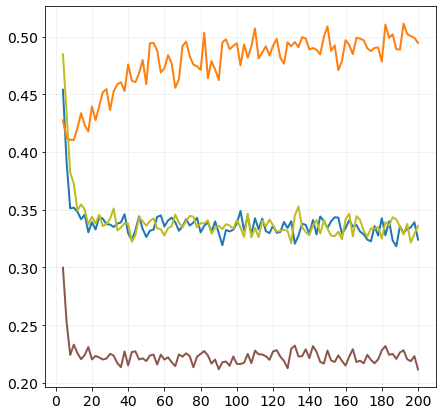

In [24]:
# Figure 4 - left and middle
x_i = 0.75
modes_and_estimates = [('org', 'mle'), ('rec', 'mle'), ('org', 'map'), ('rec', 'map')]
n_range = np.arange(4, 201, 2)
num_trials_per_n = 5000
fig, ax1 = plt.subplots(figsize=(7,7))
fig, ax2 = plt.subplots(figsize=(7,7))
colors = ['tab:blue', 'tab:orange', 'tab:olive', 'tab:brown']
labels = ['organic, MLE', 'recommender, MLE', 'organic, MAP', 'recommender, MAP']
plot_yki_over_n(VAR_US, VAR_IT, VAR_NOI, x_i, modes_and_estimates, n_range, num_trials_per_n, 
                ax1, colors, labels=labels, ax_var=ax2, set_axis_labels=False, item_dist='normal', 
                plot_expected=False)

xticks = np.arange(0, 201, 20)
ax1.set_xticks(xticks)
# axes[0].set_xlabel('Number of items available (n)', fontsize=14)
# axes[0].set_ylabel('Average match for user i', fontsize=14)
# axes[0].legend(loc='center right', fontsize=16)
ax2.set_xticks(xticks)
# axes[1].set_xlabel('Number of items available (n)', fontsize=14)
# axes[1].set_ylabel('Variance in matches for user i', fontsize=14)  # no legend for variance plot

## Population metrics

20
40
60
80
100
120
140
160
180
200


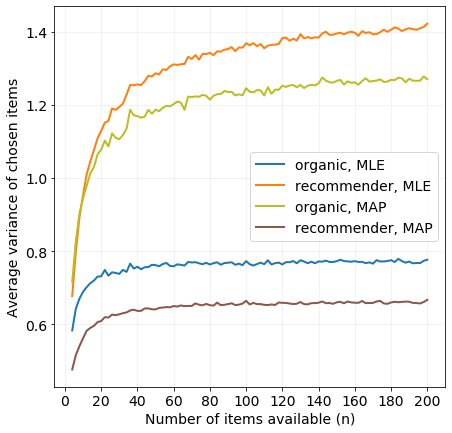

In [27]:
# Figure 4 - right
modes_and_estimates = [('org', 'mle'), ('rec', 'mle'), ('org', 'map'), ('rec', 'map')]
colors = ['tab:blue', 'tab:orange', 'tab:olive', 'tab:brown']
labels = ['organic, MLE', 'recommender, MLE', 'organic, MAP', 'recommender, MAP']
n_range = np.arange(4, 201, 2)
num_trials_per_n = 500
fig, ax = plt.subplots(1, 1, figsize=(7,7))
plot_Yk_variance_over_n(VAR_US, VAR_IT, VAR_NOI, M, modes_and_estimates, n_range, num_trials_per_n,
                        ax, colors, labels=labels, set_axis_labels=True, user_dist='normal', item_dist='normal', 
                        plot_expected=False, verbose=True)
xticks = np.arange(0, 201, 20)
ax.set_xticks(xticks)